In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [53]:
train_images.shape

(60000, 28, 28)

In [54]:
train_labels.shape

(60000,)

In [55]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [56]:
test_images.shape

(10000, 28, 28)

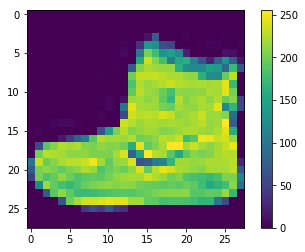

In [57]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [58]:
# Scale -1 to 1.
mean_image = np.mean(train_images, axis=0)
print("mean image shape: ", mean_image.shape)

train_images = train_images - mean_image
test_images = test_images - mean_image

mean image shape:  (28, 28)


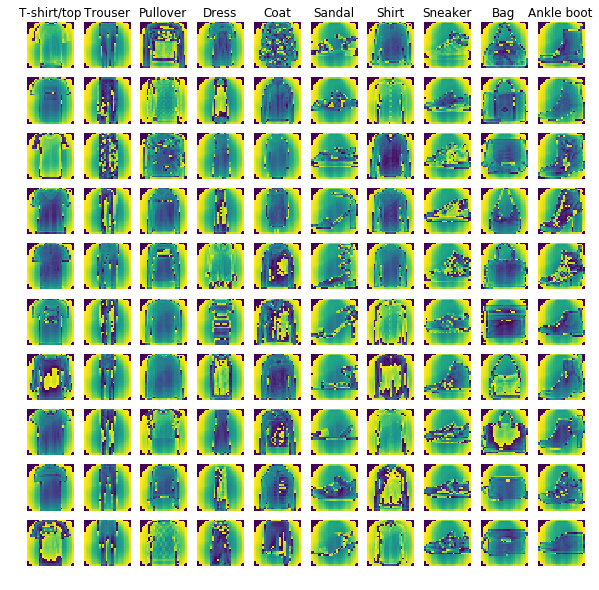

In [63]:
plt.figure(figsize=(10, 10))
num_classes = len(class_names)
sample_per_class = 10

for y, cls in enumerate(class_names):
    idxs = np.flatnonzero(train_labels == y)
    idxs = np.random.choice(idxs, sample_per_class, replace=False)
    
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(sample_per_class, num_classes, plt_idx)
        plt.imshow(train_images[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)

plt.show()

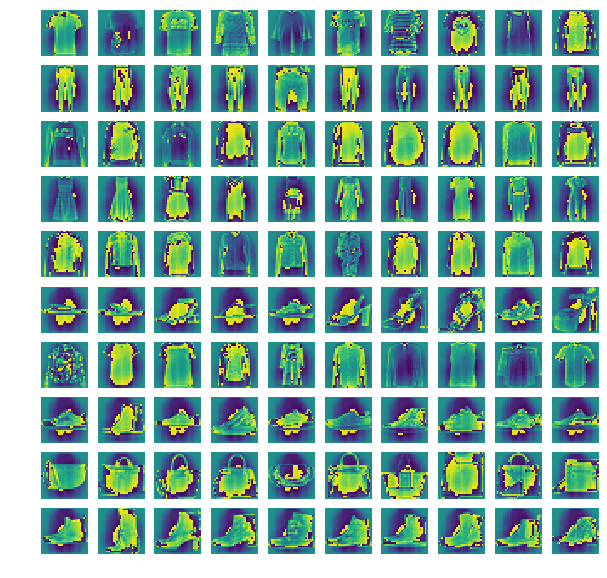

In [71]:
plt.figure(figsize=(10, 10))

num_classes = len(class_names)
sample_per_class = 10

for y, cls in enumerate(class_names):
    idxs = np.flatnonzero(y == train_labels)
    idxs = np.random.choice(idxs, sample_per_class, replace=False)
    
    for i, idx in enumerate(idxs):
        plt_idx = y * num_classes + i + 1
        plt.subplot(num_classes, sample_per_class, plt_idx)
        plt.axis('off')
        plt.imshow(train_images[idx].astype('int8'))
        
        if (i == 0):
            plt.ylabel(cls)

plt.show()

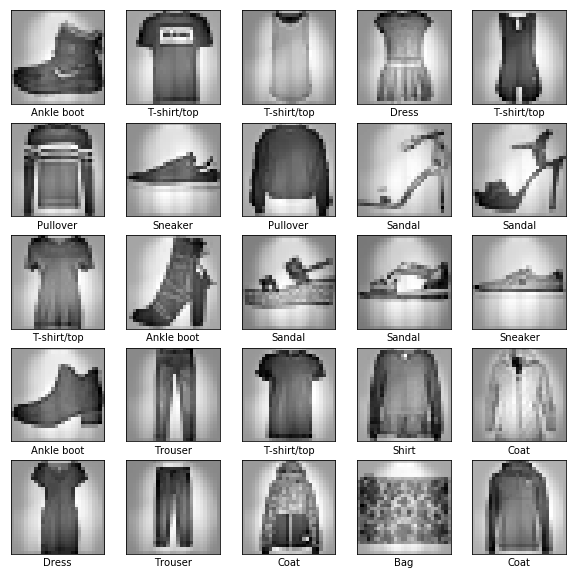

In [76]:
plt.figure(figsize=(10, 10))
num_figures = 25

for i in range(num_figures):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [77]:
# Create model
# (N, 28*28) -> (N, 128) -> relu -> (N, 10) -> softmax -> (N, 10)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0904 22:21:04.536171 139681965746048 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [82]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 99us/sample - loss: 9.3775 - acc: 0.7943
Epoch 2/5
60000/60000 [==============================] - 5s 88us/sample - loss: 2.6045 - acc: 0.8243
Epoch 3/5
60000/60000 [==============================] - 5s 90us/sample - loss: 1.6238 - acc: 0.8268
Epoch 4/5
60000/60000 [==============================] - 5s 90us/sample - loss: 1.4725 - acc: 0.8250
Epoch 5/5
60000/60000 [==============================] - 5s 88us/sample - loss: 1.4978 - acc: 0.8285


In [83]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy: ', test_acc)

10000/10000 [==============================] - 1s 60us/sample - loss: 2.7192 - acc: 0.7874
Test accuracy:  0.7874


In [0]:
predictions = model.predict(test_images)

In [85]:
predictions[0]

array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 1.059951e-17,
       0.000000e+00, 1.000000e+00], dtype=float32)

In [86]:
np.argmax(predictions[0])

9

In [87]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = \
            predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

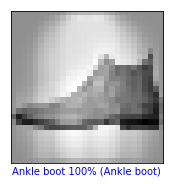

In [93]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)

In [0]:
img = test_images[0]

In [0]:
img = np.expand_dims(img, 0)

In [97]:
img.shape

(1, 28, 28)

In [0]:
predictions_single = model.predict(img)

In [0]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

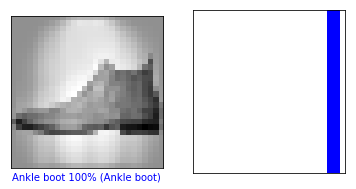

In [104]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

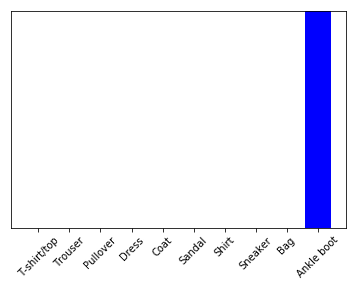

In [105]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [106]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
